### 1. 얼굴 인식

file_list: ['나.jpg', '코쿤.jpg', '이종석.jpg', '박서준.jpg', '나2.jpg', '박보검.jpg']


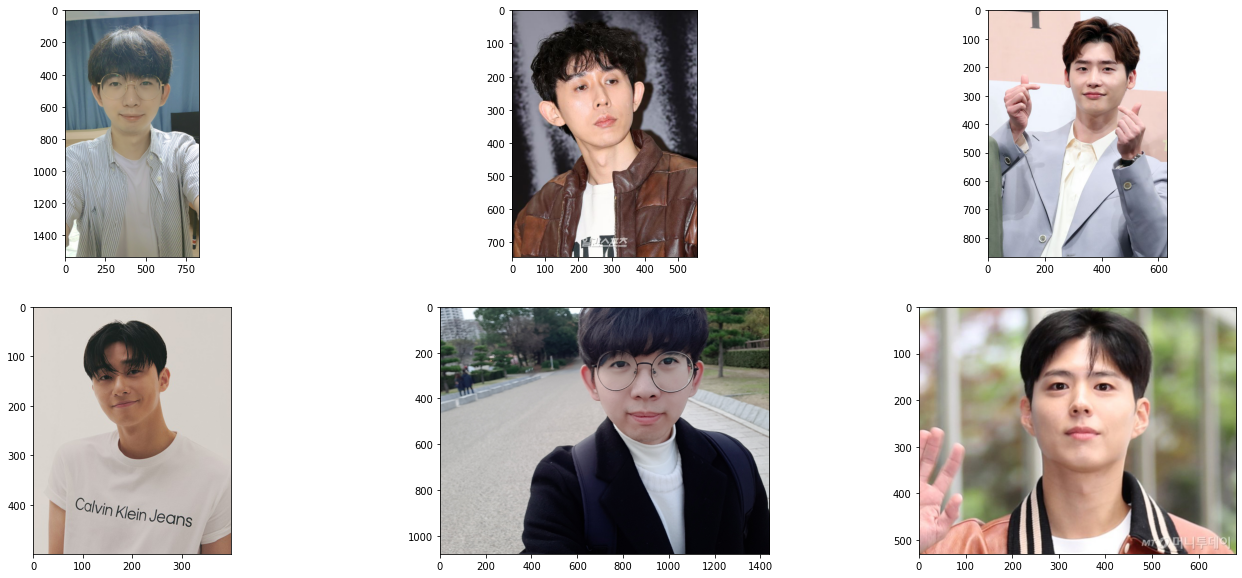

In [152]:
import os

dir_path = os.getenv('HOME')+'/aiffel/picture/entertain'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(118, 464, 341, 241)]


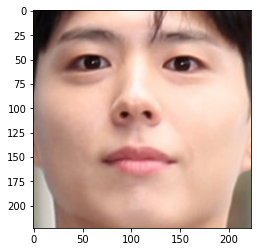

In [153]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/picture/entertain/박보검.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)

a,b,c,d = face_locations[0]
cropped_face = image[a:c,d:b,:]
plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [154]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

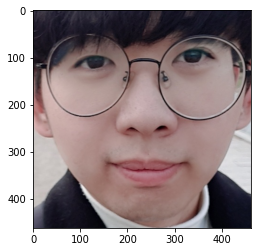

In [155]:
image_path = os.getenv('HOME')+'/aiffel/picture/entertain/나2.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### 2. 얼굴 임베딩 만들어 보기

In [156]:
import os

dir_path = os.getenv('HOME')+'/aiffel/picture/entertain'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['나.jpg', '코쿤.jpg', '이종석.jpg', '박서준.jpg', '나2.jpg', '박보검.jpg']


In [157]:
image_file = os.path.join(dir_path, '박보검.jpg')
face = get_cropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.10909976,  0.05823651,  0.00141671, -0.04544116, -0.10614165,
         0.00409521, -0.0940799 , -0.12810306,  0.04743281, -0.20221274,
         0.23016301, -0.08245058, -0.22124353, -0.09673276, -0.07917569,
         0.16364671, -0.14774573, -0.16332833,  0.00863476,  0.05784079,
         0.17463486,  0.0307611 , -0.00849752,  0.03425223, -0.15213698,
        -0.28393498, -0.15250444, -0.05945324, -0.03122102, -0.03573435,
        -0.07052494, -0.03827851, -0.15842178,  0.0054531 ,  0.01765843,
         0.05523276, -0.01501112, -0.07839563,  0.12931286,  0.00906384,
        -0.27276173,  0.04958334,  0.07905237,  0.22857833,  0.18461488,
         0.04349023, -0.00735856, -0.17142077,  0.10527461, -0.20287494,
         0.05324348,  0.14028664,  0.10657083,  0.05143849,  0.03466356,
        -0.07625089,  0.057832  ,  0.18157619, -0.13726383,  0.04082181,
         0.0722739 , -0.03145637,  0.04636538, -0.06856665,  0.19723997,
         0.07210401, -0.12740891, -0.198999  ,  0.1

In [158]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [159]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['나']

array([-0.02765969,  0.04475518,  0.0255194 , -0.07189212, -0.05768245,
       -0.08432641, -0.05390702, -0.06963356,  0.09095732, -0.07113275,
        0.19722934, -0.07487442, -0.17928779, -0.08750249, -0.02205404,
        0.15341364, -0.17707795, -0.12250043, -0.09964482,  0.00427169,
        0.10564571,  0.01131795, -0.04689277,  0.03238024, -0.11005186,
       -0.32567641, -0.0991179 , -0.06063872,  0.00771365, -0.05300915,
       -0.03386629,  0.03942341, -0.21390912, -0.06935135,  0.06219108,
        0.07955779, -0.0028551 , -0.08351436,  0.16898967,  0.01940387,
       -0.24448426,  0.12140874,  0.04954387,  0.2053176 ,  0.18881266,
        0.0389575 ,  0.03881831, -0.16883458,  0.14239806, -0.13107751,
        0.03876125,  0.17027192,  0.07182577,  0.09028857,  0.00427907,
       -0.08414723,  0.07813266,  0.09076287, -0.18424107, -0.00145064,
        0.10401803, -0.07220806, -0.02849839, -0.07852553,  0.14215428,
        0.02477333, -0.10203756, -0.2563751 ,  0.09640816, -0.18

In [160]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('나2', '나')

0.33869380205046395

### 3. 얼굴임베딩 공간의 시각화

In [161]:
def get_nearest_face(name,top=5):
    pass
get_nearest_face('박보검')

In [162]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1,name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('박보검') 

In [163]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('박보검',
  array([-0.10909976,  0.05823651,  0.00141671, -0.04544116, -0.10614165,
          0.00409521, -0.0940799 , -0.12810306,  0.04743281, -0.20221274,
          0.23016301, -0.08245058, -0.22124353, -0.09673276, -0.07917569,
          0.16364671, -0.14774573, -0.16332833,  0.00863476,  0.05784079,
          0.17463486,  0.0307611 , -0.00849752,  0.03425223, -0.15213698,
         -0.28393498, -0.15250444, -0.05945324, -0.03122102, -0.03573435,
         -0.07052494, -0.03827851, -0.15842178,  0.0054531 ,  0.01765843,
          0.05523276, -0.01501112, -0.07839563,  0.12931286,  0.00906384,
         -0.27276173,  0.04958334,  0.07905237,  0.22857833,  0.18461488,
          0.04349023, -0.00735856, -0.17142077,  0.10527461, -0.20287494,
          0.05324348,  0.14028664,  0.10657083,  0.05143849,  0.03466356,
         -0.07625089,  0.057832  ,  0.18157619, -0.13726383,  0.04082181,
          0.0722739 , -0.03145637,  0.04636538, -0.06856665,  0.19723997,
          0.07210401, -0.1274

In [164]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [165]:
get_nearest_face('나')

순위 1 : 이름(나2), 거리(0.33869380205046395)
순위 2 : 이름(이종석), 거리(0.4345937499808922)
순위 3 : 이름(코쿤), 거리(0.46334450746100525)
순위 4 : 이름(박서준), 거리(0.49941763143209444)
순위 5 : 이름(박보검), 거리(0.5058392477660824)


### 딥러닝이 인정한 이종석 닮은꼴